#**Machine Learning for Credit Risk Analysis**


### Import Library

In [630]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [631]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [632]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 75)

### Sneak Peak Data

In [633]:
#Looking at the first 5 rows of the dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [634]:
#Looking at the last 5 rows of the dataset
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [635]:
#How many rows and columns in the dataset?
df.shape

(466285, 75)

In [636]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Handling Missing Values

In [637]:
#Checking for missing values
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [638]:
#Deleting unused columns
dropped = ['revol_bal', 'id', 'member_id', 'Unnamed: 0', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title', 'addr_state', 'zip_code', 'next_pymnt_d', 'last_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'mths_since_last_major_derog', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'out_prncp', 'out_prncp_inv', 'total_rev_hi_lim']

df.drop(columns = dropped, axis=1, inplace=True)

In [639]:
#Deleting all columns with null value above 90%
df = df.loc[:, df.isnull().mean() < .9]

In [640]:
df.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      340
total_acc                        29
initial_list_status               0
collections_12_mths_ex_med      145
policy_code                       0
application_type                  0
acc_now_delinq              

## Data Preprocessing

###Loan Status

In [641]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [642]:
good_loan = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 'Late (16-30 days)']
df['loan_stats'] = np.where(df['loan_status'].isin(good_loan), 0, 1)

In [643]:
df.drop('loan_status', axis=1, inplace=True)

###Categorical Data

In [644]:
df['policy_code'].unique()

array([1])

In [645]:
#Policy code only has 1 unique value
df.drop('policy_code', axis=1, inplace=True)

In [646]:
#Application type only has 1 unique value
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [647]:
df.drop('application_type', axis=1, inplace=True)

In [648]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [649]:
#Cleaning emp_length values
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')
df['emp_length'] = df['emp_length'].astype(float)

In [650]:
#Converting emp_title values to uppercase
df['emp_title'] = df['emp_title'].str.upper()

In [651]:
#Cleaning term values
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

In [652]:
#Looking at values in other columns
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts()[:20])
    print('\n')

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64


B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
Name: sub_grade, dtype: int64


TEACHER               6663
MANAGER               6005
REGISTERED NURSE      3278
SUPERVISOR            2857
OWNER                 2485
RN                    2472
SALES                 2449
DRIVER                2352
PROJECT MANAGER       1891
OFFICE MANAGER        1861
GENERAL MANAGER       1694
TRUCK DRIVER          1472
DIRECTOR              1289
ENGINEER              1284
POLICE OFFICER        1123
PRESIDENT             1095
STORE MANAGER         1076
VICE PRESIDENT        1059
OPERATIONS MANAGER    1041
SALES MANAGER         1026
Name: emp_title, dtype: int64


MORTGAGE    235875
RENT        188473
OWN   

In [653]:
#Dominated by a single value
df.drop('pymnt_plan', axis=1, inplace=True)

###Date

####earliest_cr_line

In [654]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [655]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-12-31') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head()

0    384.0
1    213.0
2    182.0
3    251.0
4    252.0
Name: mths_since_earliest_cr_line, dtype: float64

In [656]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        228.482430
std          93.974829
min        -623.000000
25%         172.000000
50%         214.000000
75%         274.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [657]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-548.0
1770,2068-09-01,-620.0
2799,2064-09-01,-572.0
3282,2067-09-01,-608.0
3359,2065-02-01,-577.0


In [658]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [659]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

####issue_d

In [660]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [661]:
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2016-12-31') - df['issue_d']) / np.timedelta64(1, 'M')))
df['mths_since_issue_d'].head()

0    61.0
1    61.0
2    61.0
3    61.0
4    61.0
Name: mths_since_issue_d, dtype: float64

In [662]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean         40.255187
std          14.340154
min          25.000000
25%          30.000000
50%          36.000000
75%          46.000000
max         115.000000
Name: mths_since_issue_d, dtype: float64

In [663]:
df.drop(['issue_d'], axis=1, inplace=True)

In [664]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_stats,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,36.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,83.7,9.0,f,0.0,0.0,NaN,NaN,0,384.0,61.0
1,2500,60.0,15.27,59.83,C,C4,RYDER,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,9.4,4.0,f,0.0,0.0,NaN,NaN,1,213.0,61.0
2,2400,36.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,98.5,10.0,f,0.0,0.0,NaN,NaN,0,182.0,61.0
3,10000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,21.0,37.0,f,0.0,0.0,NaN,NaN,0,251.0,61.0
4,3000,60.0,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,53.9,38.0,f,0.0,0.0,NaN,NaN,0,252.0,61.0


## Exploratory Data Analysis

In [665]:
#Describing the dataset
df.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_stats,mths_since_earliest_cr_line,mths_since_issue_d
count,466285.000000,466285.000000,466285.000000,466285.000000,445277.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,465945.000000,466256.000000,466140.000000,466256.000000,3.960090e+05,3.960090e+05,466285.000000,466256.000000,466285.000000
mean,14317.277577,42.605334,13.829236,432.061201,5.993330,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,56.176947,25.064430,0.009085,0.004002,1.919135e+02,1.388017e+05,0.109307,231.385374,40.255187
std,8286.509164,10.719040,4.357587,243.485550,3.627044,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,23.732628,11.600141,0.108648,0.068637,1.463021e+04,1.521147e+05,0.312024,86.460310,14.340154
min,500.000000,36.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,62.000000,25.000000
25%,8000.000000,36.000000,10.990000,256.690000,3.000000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,39.200000,17.000000,0.000000,0.000000,0.000000e+00,2.861800e+04,0.000000,173.000000,30.000000
50%,12000.000000,36.000000,13.660000,379.890000,6.000000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,57.600000,23.000000,0.000000,0.000000,0.000000e+00,8.153900e+04,0.000000,215.000000,36.000000
75%,20000.000000,60.000000,16.490000,566.580000,10.000000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,74.700000,32.000000,0.000000,0.000000,0.000000e+00,2.089530e+05,0.000000,274.000000,46.000000
max,35000.000000,60.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,892.300000,156.000000,20.000000,5.000000,9.152545e+06,8.000078e+06,1.000000,576.000000,115.000000


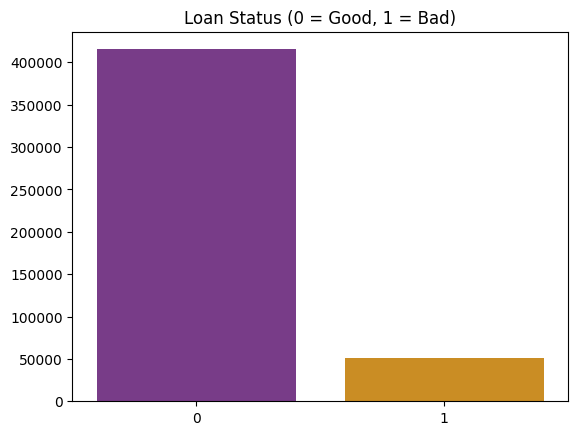

In [666]:
data_plot  = df['loan_stats'].value_counts().to_list()
label_plot = df['loan_stats'].value_counts().index.to_list()

title = 'Loan Status (0 = Good, 1 = Bad)'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [667]:
df['loan_stats'].value_counts()

0    415317
1     50968
Name: loan_stats, dtype: int64

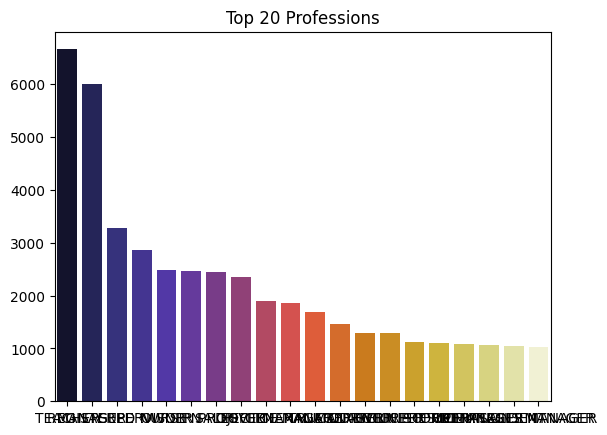

In [668]:
data_plot  = df['emp_title'].value_counts()[:20].to_list()
label_plot = df['emp_title'].value_counts()[:20].index.to_list()

title = 'Top 20 Professions'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)
plt.show()

In [669]:
df['emp_title'].value_counts()[:20]

TEACHER               6663
MANAGER               6005
REGISTERED NURSE      3278
SUPERVISOR            2857
OWNER                 2485
RN                    2472
SALES                 2449
DRIVER                2352
PROJECT MANAGER       1891
OFFICE MANAGER        1861
GENERAL MANAGER       1694
TRUCK DRIVER          1472
DIRECTOR              1289
ENGINEER              1284
POLICE OFFICER        1123
PRESIDENT             1095
STORE MANAGER         1076
VICE PRESIDENT        1059
OPERATIONS MANAGER    1041
SALES MANAGER         1026
Name: emp_title, dtype: int64

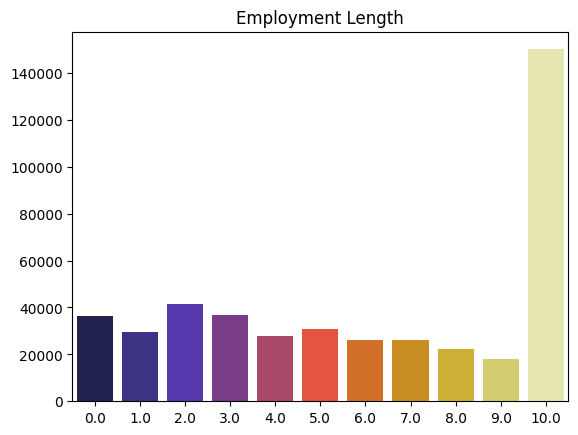

In [670]:
data_plot  = df['emp_length'].value_counts().to_list()
label_plot = df['emp_length'].value_counts().index.to_list()

title = 'Employment Length'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [671]:
df['emp_length'].value_counts()

10.0    150049
2.0      41373
3.0      36596
0.0      36265
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: emp_length, dtype: int64

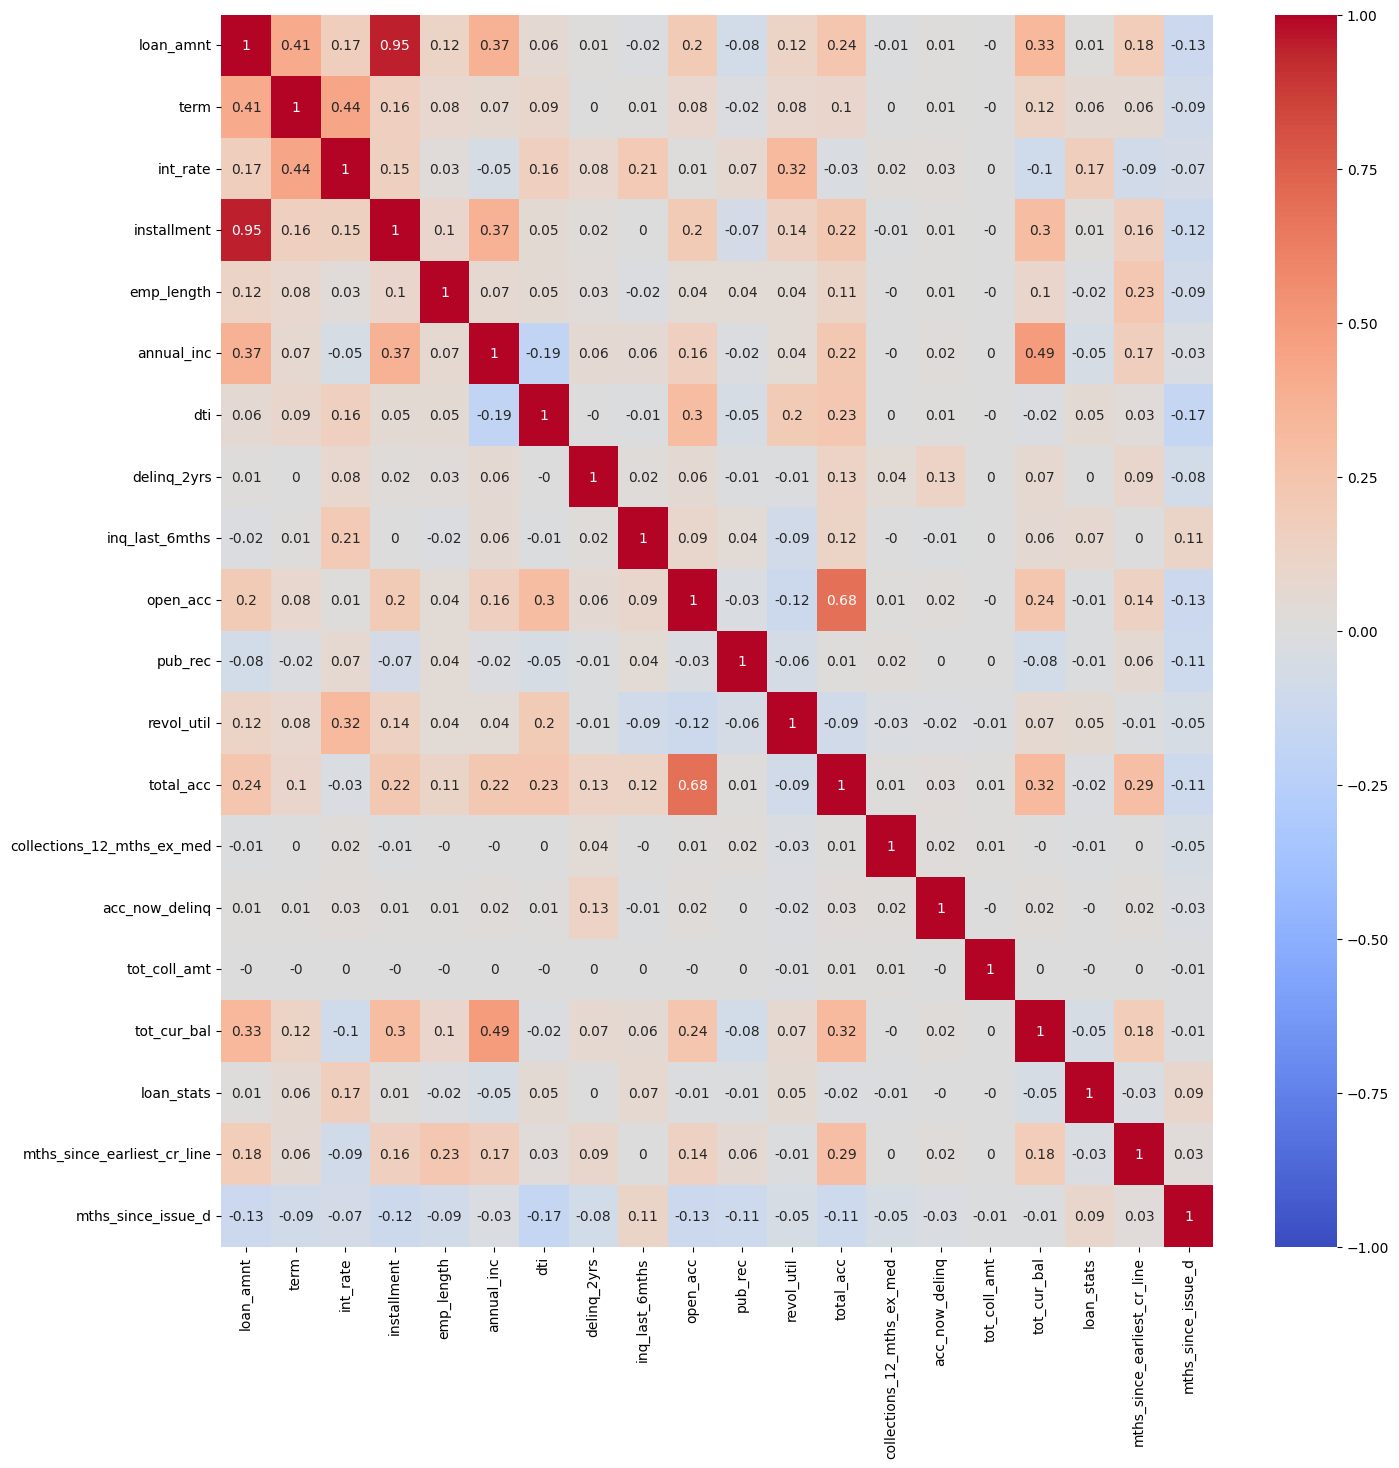

In [672]:
#Correlations between features
matrix = df.corr().round(2)
plt.figure(figsize=(16,16))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
title = 'Feature Correlations'
plt.show()

In [673]:
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts())
    print('\n')

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64


B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64


TEACHER                         6663
MANAGER                         6005
REGISTERED NURSE                3278
SUPERVISOR                      2857
OWNER                           2485
                                ... 
SHMA                               1
COOKEVILLE HOUSING AUTHORITY       1
PRODUCTION MANUFACTURING           1
ADM-STRATAS FOODS                  1
SERVER ENGINEER LEAD               1
Name: emp_title, Length: 1833

In [674]:
#Risk percentage of bad credit
def risk_percentage(x):
    ratio = (df.groupby(x)['loan_stats']
         .value_counts(normalize=True)
         .mul(100)
         .rename('risk (%)')
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_stats'] == 1], x=x, y='risk (%)')
    plt.title(x)
    plt.show()

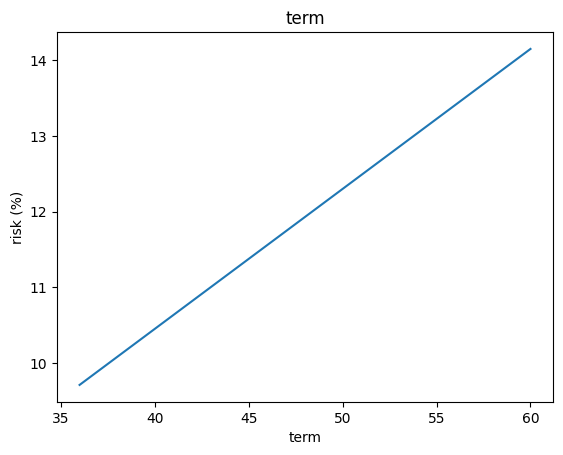

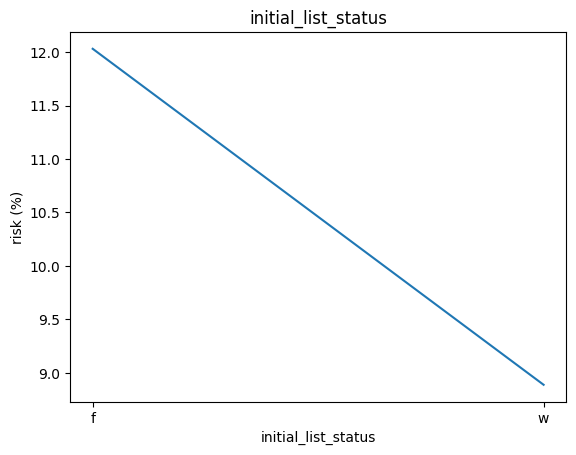

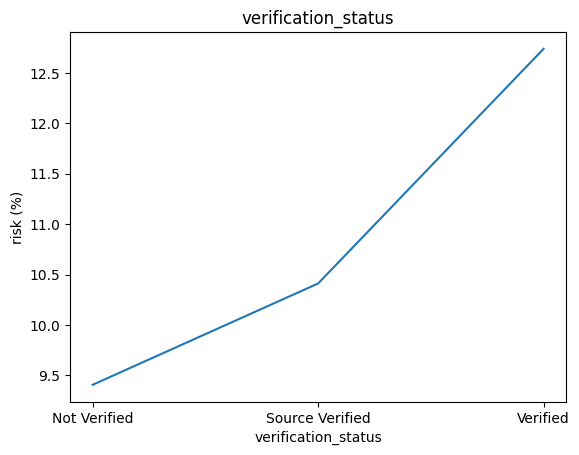

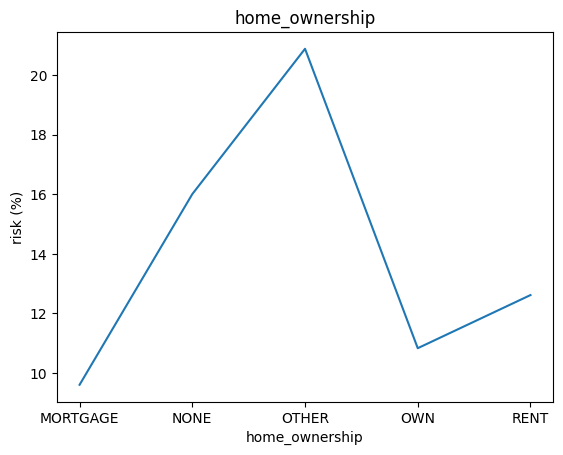

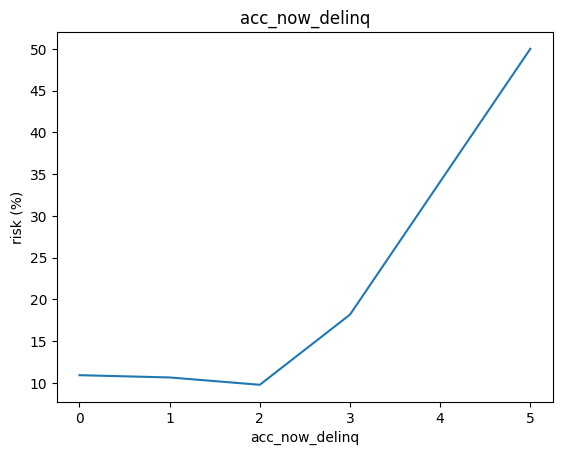

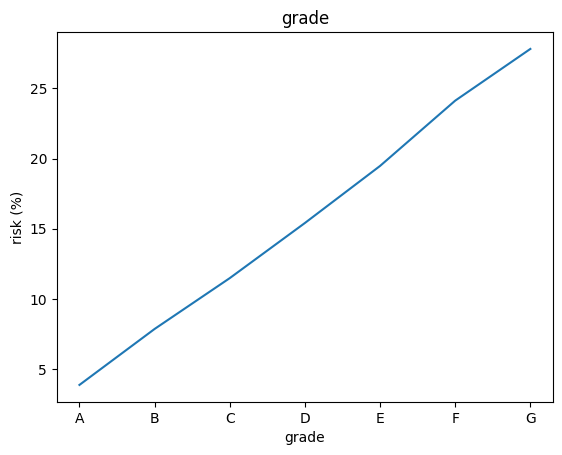

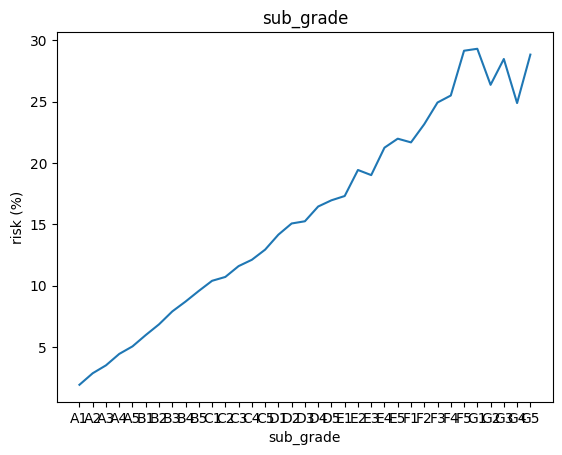

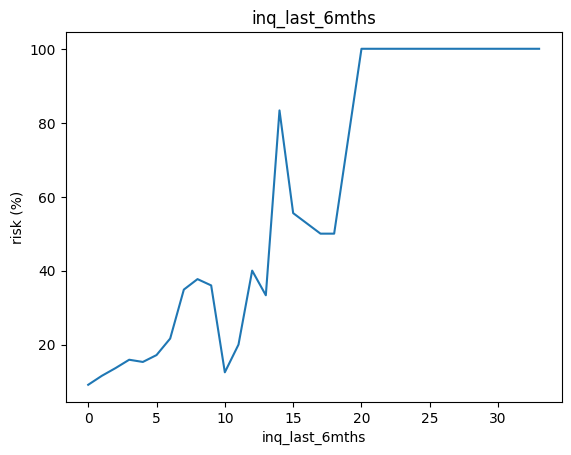

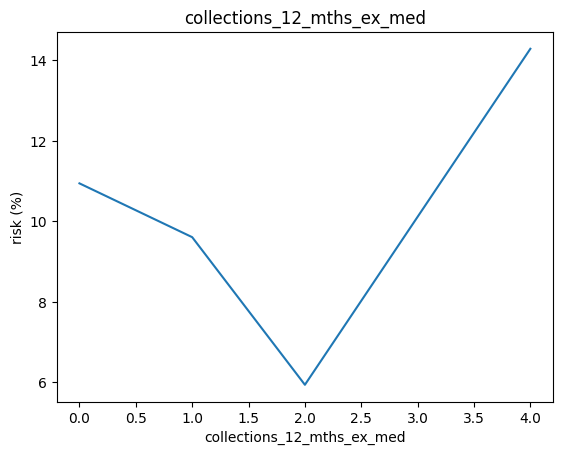

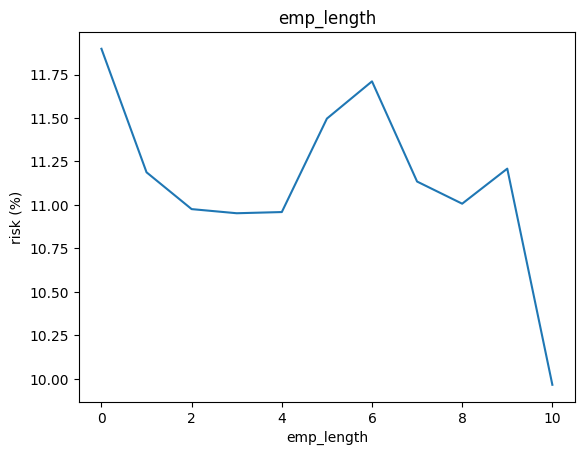

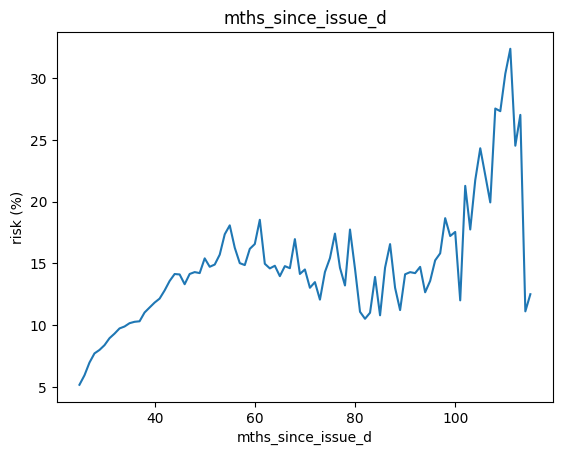

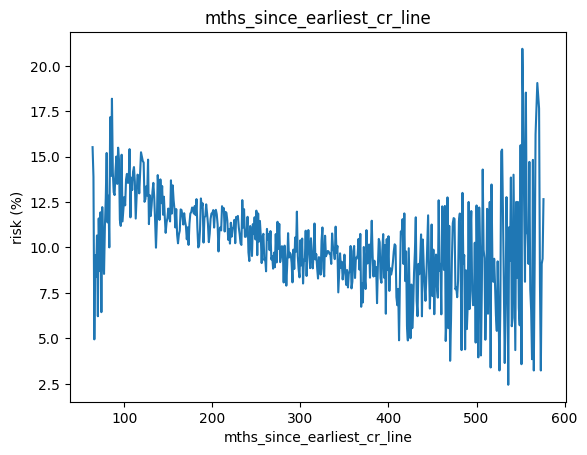

In [675]:
columns = ['term', 'initial_list_status', 'verification_status', 'home_ownership', 'acc_now_delinq','grade', 'sub_grade', 'inq_last_6mths', 'collections_12_mths_ex_med', 'emp_length', 'mths_since_issue_d', 'mths_since_earliest_cr_line']
for cols in columns:
    risk_percentage(cols)

In [676]:
df.groupby(by = 'loan_stats').mean()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d
loan_stats,,,,,,,,,,,,,,,,,,,
0,14282.967769,42.366645,13.566123,430.872539,6.014329,74237.489095,17.086460,0.284336,0.776790,11.197856,0.162195,55.759631,25.158176,0.009280,0.004007,197.848823,141413.933703,232.418620,39.815250
1,14596.853908,44.550306,15.973236,441.747112,5.820265,65453.939742,18.296797,0.287472,1.032532,11.099166,0.147278,59.579049,24.300540,0.007499,0.003964,139.159854,115584.006467,222.965918,43.840057


In [677]:
pd.crosstab(index=df['loan_stats'], columns=df['grade'])

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,71970,126170,110909,65040,28793,10037,2398
1,2897,10759,14384,11848,6964,3192,924


In [678]:
pd.crosstab(index=df['loan_stats'], columns=df['sub_grade'])

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10339,10643,12128,18201,20659,21510,24789,29184,27851,22836,24152,23877,22383,21187,19310,16535,14478,12642,11780,9605,7470,6985,5650,4719,3969,3086,2306,2033,1540,1072,784,606,417,317,274
1,202,313,440,844,1098,1366,1821,2502,2654,2416,2801,2863,2934,2918,2868,2726,2568,2274,2319,1961,1563,1684,1326,1273,1118,854,695,675,527,441,325,217,166,105,111


In [679]:
pd.crosstab(index=df['loan_stats'], columns=df['mths_since_issue_d'])

mths_since_issue_d,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9775,23569,36083,9789,17312,26853,15644,17322,17216,14881,13719,14024,13472,13059,12502,11452,11135,10385,9420,8887,8091,7172,6492,5890,5204,5399,5341,5180,4568,3824,3127,2847,2745,2481,2146,2171,1847,1898,1809,1761,1664,1598,1567,1415,1342,1238,1129,1194,1174,1049,1042,982,1003,1045,909,845,811,741,607,570,587,565,504,441,396,353,348,308,284,283,261,228,213,170,101,47,88,111,102,90,196,313,245,221,125,78,71,40,54,56,21
1,532,1485,2699,817,1502,2453,1535,1777,1855,1632,1550,1604,1548,1617,1612,1535,1539,1525,1479,1463,1328,1101,1069,982,862,983,922,907,851,803,690,553,485,433,414,431,420,334,309,306,270,277,268,289,221,210,169,186,161,175,190,207,172,159,196,144,101,87,75,92,71,97,100,66,50,58,58,51,49,41,41,41,40,39,21,10,12,30,22,25,63,89,61,84,47,34,34,13,20,7,3


In [680]:
pd.crosstab(index=df['loan_stats'], columns=df['mths_since_earliest_cr_line'])

mths_since_earliest_cr_line,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0
loan_stats,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,8,49,93,77,85,120,109,151,122,147,155,189,194,287,257,207,185,173,187,190,171,222,241,234,316,307,345,242,221,250,251,224,246,278,298,372,451,560,648,534,459,523,580,571,599,629,660,745,819,1027,1114,924,829,864,872,910,868,965,1017,1053,1238,1518,1465,1112,1097,1101,1117,1107,1014,1118,1142,1265,1458,1659,1490,1200,1215,1122,1067,1141,1075,1226,1357,1614,1883,1950,1772,1513,1444,1488,13

In [681]:
pd.crosstab(index=df['loan_stats'], columns=df['home_ownership'])

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_stats,,,,,,
0,1,213235,42,144,37189,164706
1,0,22640,8,38,4515,23767


In [682]:
pd.crosstab(index=df['loan_stats'], columns=df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
loan_stats,,,
0,134291,134376,146650
1,13946,15617,21405


In [683]:
pd.pivot_table(df, values='loan_amnt', index='loan_stats', columns='grade', aggfunc=np.mean)

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,13449.185772,13167.511294,14263.867675,15134.173201,17499.257632,18229.956660,20654.045038
1,12161.520538,12563.370202,13686.239919,14666.521776,17679.200172,19072.932331,20498.538961


In [684]:
pd.pivot_table(df, values='annual_inc', index='loan_stats', columns='grade', aggfunc=np.mean)

grade,A,B,C,D,E,F,G
loan_stats,,,,,,,
0,83266.317599,73040.260447,71253.523854,70758.831467,74328.597067,76555.014924,87832.935701
1,67561.592054,63675.745411,63143.778140,64179.295047,69351.350902,71360.196087,82080.278820


In [685]:
pd.pivot_table(df, values='loan_amnt', index='loan_stats', columns='home_ownership', aggfunc=np.mean)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_stats,,,,,,
0,5000.0,15925.906043,13638.690476,10611.111111,13481.103283,12340.437962
1,NaN,16593.950972,12643.750000,11564.473684,13660.415282,12877.856902


##Missing Data Imputation

In [686]:
df.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
purpose                            0
dti                                0
delinq_2yrs                       29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
revol_util                       340
total_acc                         29
initial_list_status                0
collections_12_mths_ex_med       145
acc_now_delinq                    29
tot_coll_amt                   70276
tot_cur_bal                    70276
loan_stats                         0
mths_since_earliest_cr_line       29
mths_since_issue_d                 0
d

In [687]:
#Filling missing data
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['tot_coll_amt'].fillna(0, inplace=True)

In [688]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_stats,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,36.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,83.7,9.0,f,0.0,0.0,0.0,0.0,0,384.0,61.0
1,2500,60.0,15.27,59.83,C,C4,RYDER,0.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,9.4,4.0,f,0.0,0.0,0.0,0.0,1,213.0,61.0
2,2400,36.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,98.5,10.0,f,0.0,0.0,0.0,0.0,0,182.0,61.0
3,10000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,21.0,37.0,f,0.0,0.0,0.0,0.0,0,251.0,61.0
4,3000,60.0,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,53.9,38.0,f,0.0,0.0,0.0,0.0,0,252.0,61.0


In [689]:
df['open_acc'] = df['open_acc'].astype(int)
df['pub_rec'] = df['pub_rec'].astype(int)
df['total_acc'] = df['total_acc'].astype(int)
df['acc_now_delinq'] = df['acc_now_delinq'].astype(int)

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  float64
 2   int_rate                     466285 non-null  float64
 3   installment                  466285 non-null  float64
 4   grade                        466285 non-null  object 
 5   sub_grade                    466285 non-null  object 
 6   emp_title                    438697 non-null  object 
 7   emp_length                   445277 non-null  float64
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466285 non-null  float64
 10  verification_status          466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  dti                          466285 non-null  float64
 13 

In [691]:
#Categorical data
cat = df.select_dtypes (include= ['object'])
cat

,grade,sub_grade,emp_title,home_ownership,verification_status,purpose,initial_list_status
0,B,B2,NaN,RENT,Verified,credit_card,f
1,C,C4,RYDER,RENT,Source Verified,car,f
2,C,C5,NaN,RENT,Not Verified,small_business,f
3,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,other,f
4,B,B5,UNIVERSITY MEDICAL GROUP,RENT,Source Verified,other,f
...,...,...,...,...,...,...,...
466280,C,C2,FINANCIAL ADVISOR,MORTGAGE,Source Verified,debt_consolidation,w
466281,D,D5,CHIEF OF INTERPRETATION (PARK RANGER),MORTGAGE,Verified,debt_consolidation,f
466282,D,D1,PATROL,MORTGAGE,Verified,debt_consolidation,f
466283,A,A4,SERVER ENGINEER LEAD,OWN,Verified,credit_card,w


In [692]:
#Removing unnecessary data
dropped = ['emp_length', 'emp_title', 'grade', 'mths_since_issue_d']
df.drop(columns = dropped, axis=1, inplace=True)

Dropped values:
* emp_title and emp_length - not relevant
* grade - in this model, sub_grade is used instead because it is more specific
* mths_since_issue_d - this data is not known before the credit is approved

In [693]:
#Labeling categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,x):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = x.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,x,y=None):
        return self.fit(x,y).transform(x)

df = MultiColumnLabelEncoder(columns = ['sub_grade', 'home_ownership', 'verification_status',	'purpose', 'initial_list_status']).fit_transform(df)

## Splitting the dataset into the Training set and Test set

In [694]:
#Defining x and y
x = df.drop(columns=['loan_stats'], axis = 1)
y = df['loan_stats']

In [695]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [696]:
x_train.shape, x_test.shape

((419656, 22), (46629, 22))

##Balancing data

The data is unbalanced, so we need to balance it first by oversampling the minority.

In [697]:
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

## Modelling

### Random Forest

In [698]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)

In [699]:
#Training the model
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [700]:
#Predict testing set
y_pred = rf.predict(x_test)

In [701]:
print('Training-set accuracy score:', rf.score(x_train, y_train))
print('Test-set accuracy score:', rf.score(x_test, y_test))

Training-set accuracy score: 0.7948885327740131
Test-set accuracy score: 0.7402260395890969


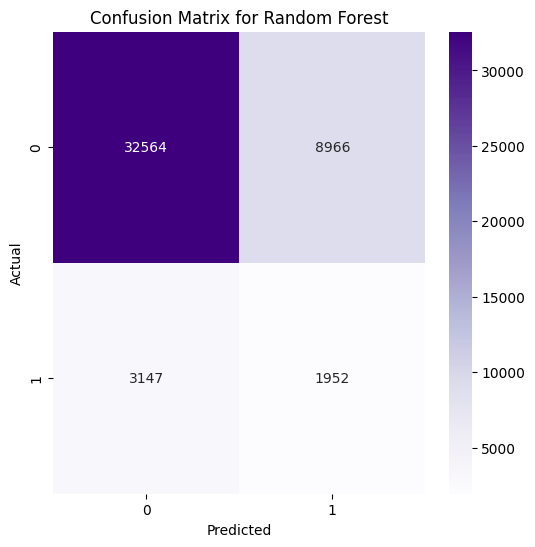

In [702]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [703]:
#Check model performance using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     41530
           1       0.18      0.38      0.24      5099

    accuracy                           0.74     46629
   macro avg       0.55      0.58      0.54     46629
weighted avg       0.83      0.74      0.78     46629



In [704]:
#Check model performance using auc score
roc_auc_score(y_test, y_pred)*100

58.34640173209981